# Sacred Experiment Comparison

The goal of this notebook is to provide a mechanism to compare sacred experiments: the cfg, the metrics, and the outcome.

In [111]:
# project imports
import env
from utils import read_json_data, flatten_dict
from models import MODEL_DIR


# python & package imports
from collections import defaultdict
import pandas as pd
import json
import os


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2


model_dir = os.path.join(MODEL_DIR, 'voxel_vaegan1', 'modelnet10')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
# Experiments

# 500 epochs, just bird
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-30-02/model_epoch-499.ckpt'
# 500 epochs, just bird, increased recon weight
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-38-41/model_epoch-499.ckpt'
# 500 epochs, just bird, dropout 0.8
# early stop
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-44-48/model_epoch-199.ckpt'
# later stop
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_09-44-48/model_epoch-499.ckpt'
#model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-12_10-22-19/model_epoch-49.ckpt'

# first run with modelnet10
# {'reconstruction_loss': 808.4996337890625, 'dis_loss': -999.0, 'kl_divergence': 488.078369140625, 'dec_loss': -999.0, 'elapsed_time': 43.02408063411713, 'enc_loss': 261.9851379394531}

# vae
best_sofa = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-15_10-33-37'
toilet_and_sofa = '/home/jcworkma/jack/3d-form/models/voxel_vaegan1/modelnet10/2019-03-15_12-26-16'
return_to_vae = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-11-20'
return_toilet = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39'
vae_200epochs = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39'

# vaegan
vaegan_sofa13 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-16_13-37-24/model_epoch-13.ckpt'
vaegan_sofa = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-16_13-37-24/model_epoch-5.ckpt'
vaegan_decent_toilets_21 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-17_08-40-29'
vaegan_long_toilets = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-18_13-12-53'
vaegan_new_losses = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-19_19-31-20'
vaegan_1024_filter_discr = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-20_09-39-05/'
vaegan_logless_loss = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-22_16-01-54'
vaegan_reuse_check = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_03-48-39'
vaegan_reuse_check2 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_04-00-49'
vaegan_reuse_check3 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_04-06-01'
vaegan_reuse_check4 = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_04-09-04'


## Model Leaderboard

In [73]:
scores = dict()
for m in os.listdir(model_dir):
    name = m
    metrics_json = os.path.join(model_dir, m, 'metrics.json')
    #print(metrics_json)
    #if os.path.exists(metrics_json):
    #    df = pd.read_json(metrics_json, orient='values')
    #    break
    metrics_dict = read_json_data(metrics_json)
    if metrics_dict:
        # assuming only keys are epoch\d+
        keys = [int(key.replace('epoch', '')) for key in metrics_dict.keys()]
        last_epoch = sorted(keys)[-1]
        last_key = 'epoch{}'.format(last_epoch)
        scores[name] = metrics_dict[last_key]
        scores[name]['epoch'] = last_epoch

df = pd.DataFrame.from_dict(scores, orient='index')

In [74]:
df.sort_values('enc_loss')

,dis_loss,reconstruction_loss,kl_divergence,dec_loss,elapsed_time,epoch,enc_loss,ll_loss
2019-03-22_16-01-54,0.002769,2.335672,3.352761e-08,0.002977,622.948439,19,0.000211,2.078947e+00
2019-03-23_04-26-53,0.025842,1.973222,7.585932e-04,0.177429,184.921859,5,0.227446,1.515868e+02
2019-03-20_09-39-05,0.000000,0.534304,2.374873e-07,8.045086,1266.072246,39,8.045110,8.045086e+04
2019-03-18_13-12-53,5.041445,0.266909,6.988272e-04,11.406572,1135.887282,99,11.474426,1.140454e+04
2019-03-17_08-40-29,4.714500,0.056535,2.244420e-02,45.475174,273.749028,21,15.197393,1.295297e+04
2019-03-21_12-22-09,0.000000,0.412828,1.419442e-03,15.351218,1247.157203,39,15.493162,1.535122e+05
2019-03-19_10-02-38,6.339924,0.107949,8.224614e-02,80.328392,113.116486,9,19.571060,1.134644e+04
2019-03-17_15-32-59,5.186166,0.109524,7.946533e-02,85.769615,906.537507,79,24.990257,1.704372e+04
2019-03-19_14-25-04,6.330705,0.099275,1.969671e-01,82.684891,112.582602,9,33.104237,1.340753e+04
2019-03-15_10-33-37,-999.000000,352.732208,5.041918e+02,-999.000000,75.421927,9,123.401489,NaN


## Config Comparison

In [79]:
cfg1 = read_json_data(os.path.join(toilet_and_sofa, 'cfg.json'), verbose=True)
cfg2 = read_json_data(os.path.join(return_to_vae, 'cfg.json'), verbose=True)
assert isinstance(cfg1, dict)
assert isinstance(cfg2, dict)

# flatten dict structure then bring into pandas for a pretty view
cfg1 = flatten_dict(cfg1)
cfg2 = flatten_dict(cfg2)
df1 = pd.DataFrame.from_dict(cfg1, orient='index', columns=['cfg1'])
df2 = pd.DataFrame.from_dict(cfg2, orient='index', columns=['cfg2'])
dff = pd.concat([df1, df2], axis=1, sort=False)
dff['diff'] = dff.cfg1 == dff.cfg2
dff

,cfg1,cfg2,diff
model/learning_rate,0.0001,NaN,False
model/batch_size,32,32,True
dataset/class,ModelNet10,ModelNet10,True
model/launch_tensorboard,True,True,True
model/no_gan,True,True,True
model/voxels_dim,32,32,True
dataset/index,/home/jcworkma/jack/3d-form/src/../data/proces...,/home/jcworkma/jack/3d-form/src/../data/proces...,False
model/verbose,True,True,True
model/display_step,6000,1,False
dataset/splits,True,True,True


## Reconstruction Test
Here we can reload a model and experiment with reconstructions.

In [113]:
# project imports
from models.voxel_vaegan import VoxelVaegan
from data.modelnet10 import ModelNet10
from data.thingi10k import Thingi10k
from data.voxels import plot_voxels
from utils import read_json_data


# python & package projects
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# model to use for reconstruction
model_root = vae_200epochs
model_cfg = read_json_data(os.path.join(model_root, 'cfg.json'))
model_ckpt = os.path.join(model_root, 'model_epoch-_end.ckpt')

# restore the model from ckpt
vaegan = VoxelVaegan.initFromCfg(model_cfg)
vaegan.restore(model_ckpt)

INFO:tensorflow:Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39/model_epoch-_end.ckpt


INFO:tensorflow:Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39/model_epoch-_end.ckpt


### From Dataset Example

toilet_0036_32_x0_z3.binvox


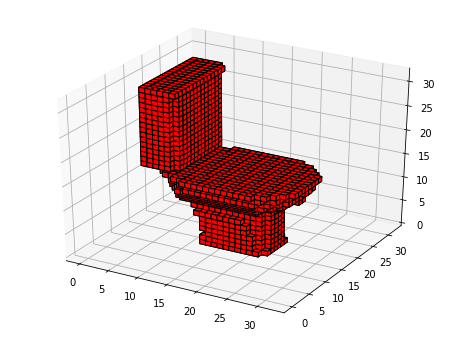

In [126]:
dataset_class = model_cfg.get('dataset').get('class')
dataset_index = model_cfg.get('dataset').get('index')
if dataset_class == 'Thingi10k':
    # get an stl example
    thingi = Thingi10k.init10k()
    stl_example = thingi.get_stl_path(stl_id=126660)
    training_example = thingi.get_voxels(32, stl_file=stl_example)
elif dataset_class == 'ModelNet10':
    modelnet = ModelNet10.initFromIndex(dataset_index)
    voxelsname, training_example = modelnet.get_random_voxels(32)
    print(voxelsname)
    
plot_voxels(training_example)
training_example = np.reshape(training_example, (-1, 32, 32, 32, 1))

# toilet_0211_32_x0_z3.binvox is an empty array!

In [127]:
recon = vaegan.reconstruct(training_example)
recon = np.reshape(recon, [32, 32, 32])
print('max: ', np.max(recon))
print('min: ', np.min(recon))
print('mean: ', np.mean(recon))

max:  0.99924016
min:  1.4632046e-18
mean:  0.19683237


<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

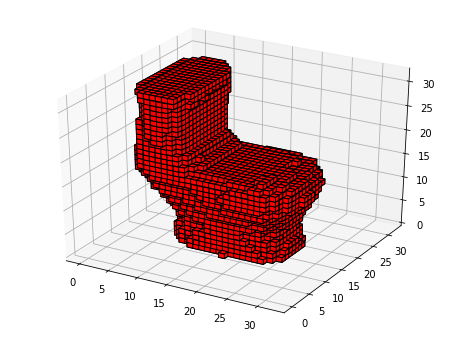

In [139]:
recon_threshold = recon > .5
plot_voxels(recon_threshold)

### From Latent Vector

In [156]:
latent_vector = vaegan.random_latent_vector()
recon = vaegan.latent_recon(latent_vector)
recon = np.reshape(recon, [32, 32, 32])
print('max: ', np.max(recon))
print('min: ', np.min(recon))
print('mean: ', np.mean(recon))

max:  0.954976
min:  7.35337e-16
mean:  0.026831364


<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

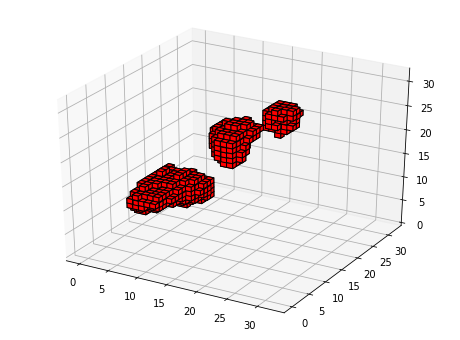

In [157]:
recon_threshold = recon > .5
plot_voxels(recon_threshold)

## Experiment Log Monitoring

In [109]:
!tail /home/jcworkma/jack/3d-form/src/logs/2019-03-23_08-20__root.log

2019-03-23 17:32:49,441 - INFO - voxel_vaegan: Memory Use (GB): 1.2551536560058594
2019-03-23 17:32:49,443 - INFO - voxel_vaegan: Enc Loss = 155.69, KL Divergence = 52.63, Reconstruction Loss = 0.01, ll_loss = -999.00, dis_Loss = -999.00, dec_Loss = -999.00, Elapsed time: 552.12 mins
2019-03-23 17:32:49,819 - INFO - voxel_vaegan: Model saved in path: /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39/model_epoch-_end.ckpt
2019-03-23 17:32:49,824 - INFO - voxel_vaegan: Metrics saved in path: /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/modelnet10/2019-03-23_08-20-39/metrics.json
2019-03-23 17:32:49,825 - INFO - train_vaegan: Saved final checkpoint
2019-03-23 17:32:49,825 - INFO - train_vaegan: Did not save experiment metrics
2019-03-23 17:32:49,826 - INFO - train_vaegan: Done train_vaegan.py main
2019-03-23 17:32:49,827 - DEBUG - captured_function: Finished after 9:12:10.
2019-03-23 17:32:49,828 - INFO - run: Completed after 9:12:10
2019-03